<a href="https://colab.research.google.com/github/amyyeeunchu/ObesityRegression/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load cleaned dataset
file_path = 'cleaned_dataset.xlsx'
df = pd.read_excel(file_path)

# Define feature matrix and target column
X = df.drop(columns=['Class'])
y = df['Class']

Correlation Matrix

                                        Sex       Age    Height  \
Sex                                1.000000  0.182114  0.690250   
Age                                0.182114  1.000000  0.115491   
Height                             0.690250  0.115491  1.000000   
Overweight_Obese_Family           -0.068580 -0.161475 -0.165359   
Consumption_of_Fast_Food          -0.059621 -0.272612 -0.031478   
Frequency_of_Consuming_Vegetables -0.146067 -0.394701 -0.090057   
Number_of_Main_Meals_Daily        -0.044877  0.328642 -0.055054   
Food_Intake_Between_Meals          0.011508  0.047053 -0.000186   
Smoking                           -0.196608 -0.077778 -0.141490   
Liquid_Intake_Daily               -0.012885  0.026510 -0.026460   
Calculation_of_Calorie_Intake      0.027745 -0.203458 -0.029721   
Physical_Excercise                 0.086369  0.337484  0.076698   
Schedule_Dedicated_to_Technology   0.005656 -0.254816  0.001916   
Type_of_Transportation_Used_2      0.098300 -0.120397  0.04060

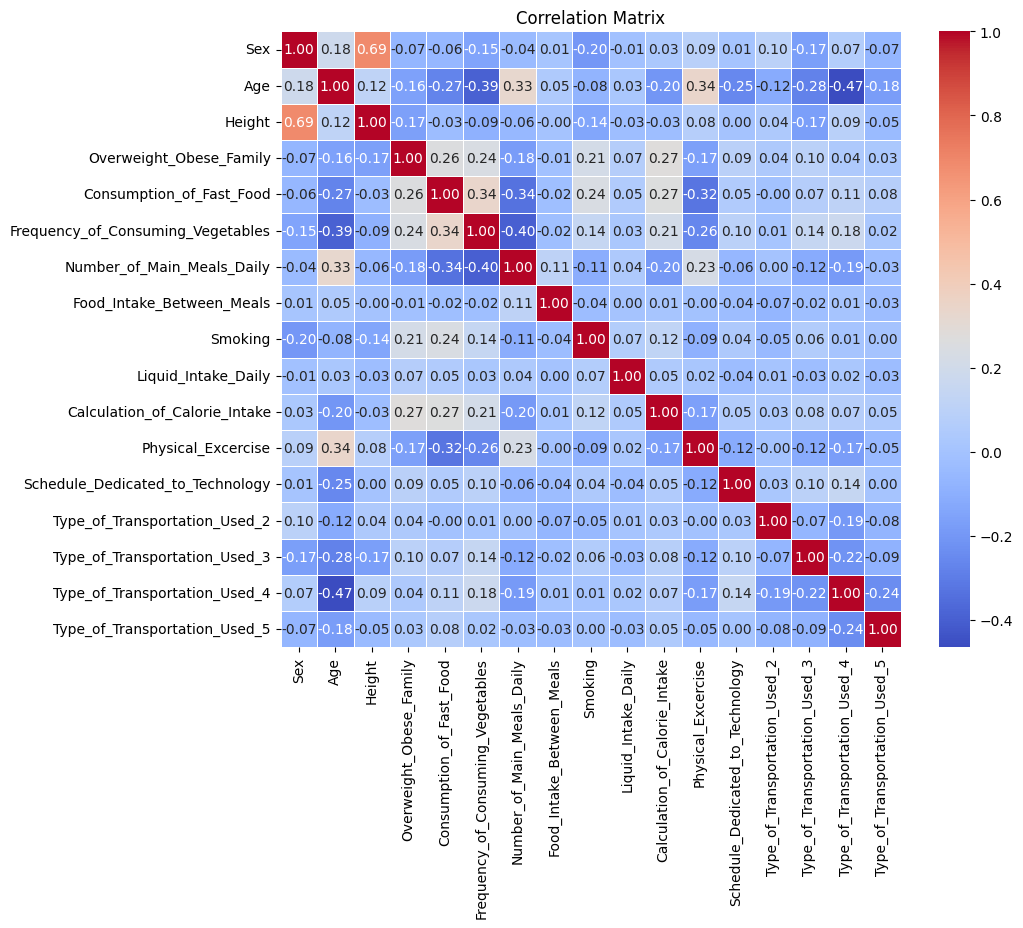

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [19]:
#Amy from Mokhtar, if you look at Excel, the transport_Used is one hot encoded but in 5 columns, this may affect the performance of the model. If you have some time I suggest treating it as an array. I left some code suggestions to help you do that
'''transport_columns = [col for col in df.columns if 'Type_of_Transportation_Used_' in col]
X = df.drop(columns=['Class']+transport_columns)
transport = df[transport_columns].astype(int).to_numpy(dtype=object)
X['Transport_Array'] = list(transport)
y = df['Class']'''
# Amy: array does not work well with kfold and Lasso, let me know if there is a workaround.
# Since one hot encoding drops one of the columns the correlation between the features are low.
#Therefore we don't expect the 'transportation_used' data to overinfluence the results.

"transport_columns = [col for col in df.columns if 'Type_of_Transportation_Used_' in col]\nX = df.drop(columns=['Class']+transport_columns)\ntransport = df[transport_columns].astype(int).to_numpy(dtype=object)\nX['Transport_Array'] = list(transport)\ny = df['Class']"

Lasso Regression Model (with KFolds CV and GridSearch)


C value: 0.001
Cross-Validation Accuracy: 0.2199
Test Accuracy: 0.3975
Selected features (indices): []


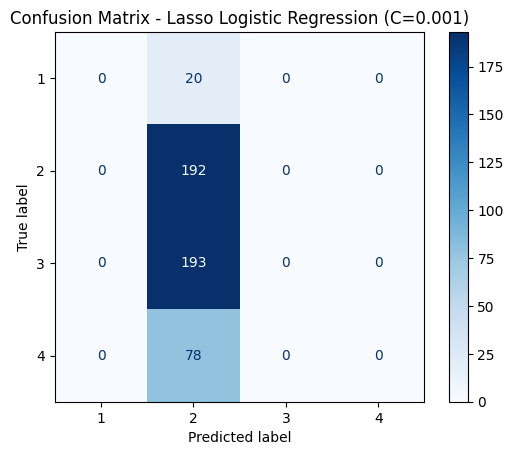


C value: 0.01
Cross-Validation Accuracy: 0.5528
Test Accuracy: 0.6977
Selected features (indices): [1 5 6]


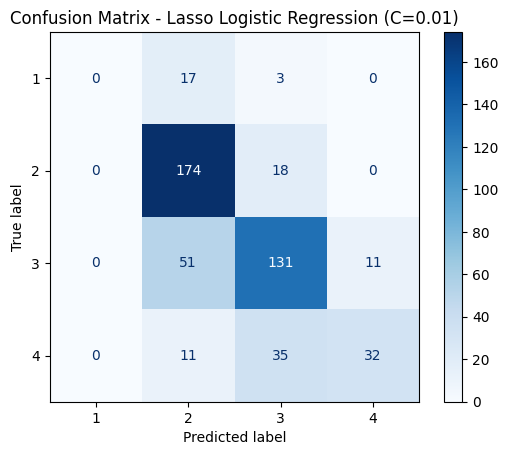


C value: 0.1
Cross-Validation Accuracy: 0.6943
Test Accuracy: 0.7143
Selected features (indices): [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


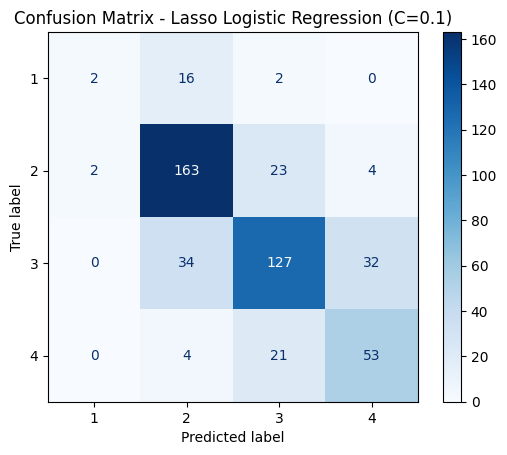


C value: 1
Cross-Validation Accuracy: 0.7309
Test Accuracy: 0.7350
Selected features (indices): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


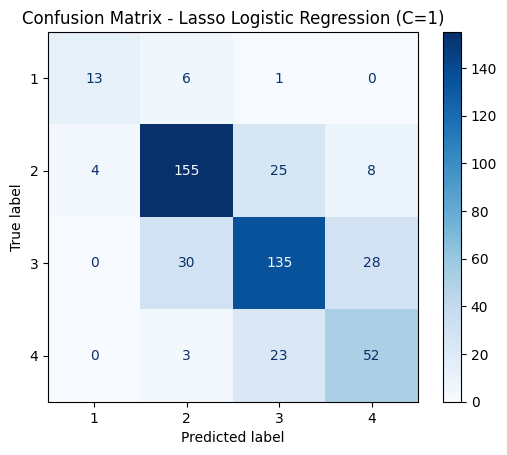


C value: 10
Cross-Validation Accuracy: 0.7267
Test Accuracy: 0.7371
Selected features (indices): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


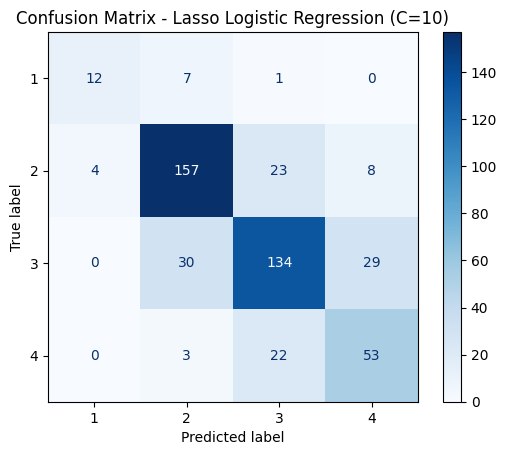

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 


C value: 100
Cross-Validation Accuracy: 0.7289
Test Accuracy: 0.7391
Selected features (indices): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


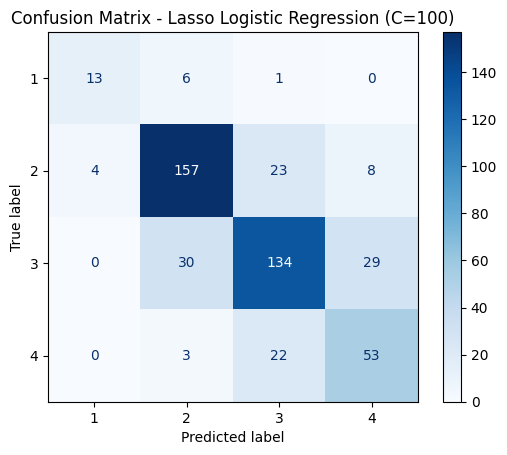


Summary of Results:
C=0.001: CV Accuracy = 0.2199, Test Accuracy = 0.3975
C=0.01: CV Accuracy = 0.5528, Test Accuracy = 0.6977
C=0.1: CV Accuracy = 0.6943, Test Accuracy = 0.7143
C=1: CV Accuracy = 0.7309, Test Accuracy = 0.7350
C=10: CV Accuracy = 0.7267, Test Accuracy = 0.7371
C=100: CV Accuracy = 0.7289, Test Accuracy = 0.7391


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different C values (regularization strength)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize an empty list to store results
results = []

# Initialize K-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over each C value and train the model
for C_value in C_values:
    # Implement Lasso Logistic Regression with multiclass
    lasso_lr = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=C_value)

    # Perform K-fold Cross-Validation
    cv_scores = cross_val_score(lasso_lr, X_train, y_train, cv=kfold, scoring='f1_weighted')

    # Calculate the average accuracy from cross-validation
    avg_accuracy = np.mean(cv_scores)

    # Train the model using training set
    lasso_lr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_lr.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Results
    results.append((C_value, avg_accuracy, accuracy, conf_matrix))
    selected_features = np.unique(np.where(lasso_lr.coef_ != 0)[1])
    print(f"\nC value: {C_value}")
    print(f"Cross-Validation Accuracy: {avg_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Selected features (indices): {selected_features}")

    # Confusion Matrix Display
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lasso_lr.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - Lasso Logistic Regression (C={C_value})")
    plt.show()

# summary
print("\nSummary of Results:")
for result in results:
    C_value, avg_accuracy, accuracy, _ = result
    print(f"C={C_value}: CV Accuracy = {avg_accuracy:.4f}, Test Accuracy = {accuracy:.4f}")


Lasso Regression with PCA


C value: 0.001, PCA Variance Threshold: 0.9
Cross-Validation Accuracy: 0.2419
Test Accuracy: 0.3975
Selected features (indices in PCA-transformed space): []


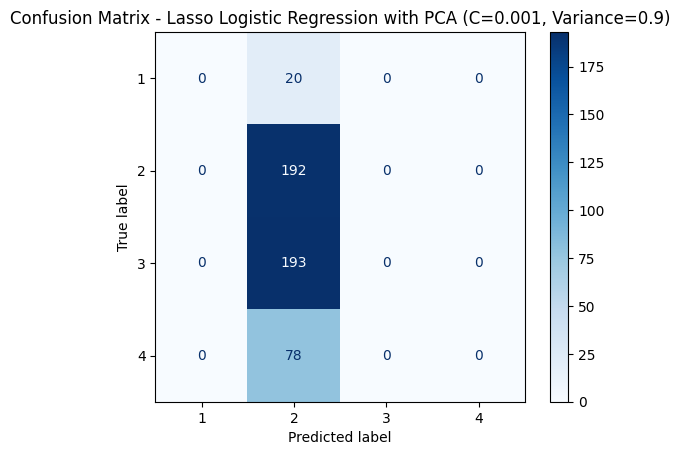


C value: 0.001, PCA Variance Threshold: 0.92
Cross-Validation Accuracy: 0.2419
Test Accuracy: 0.3975
Selected features (indices in PCA-transformed space): []


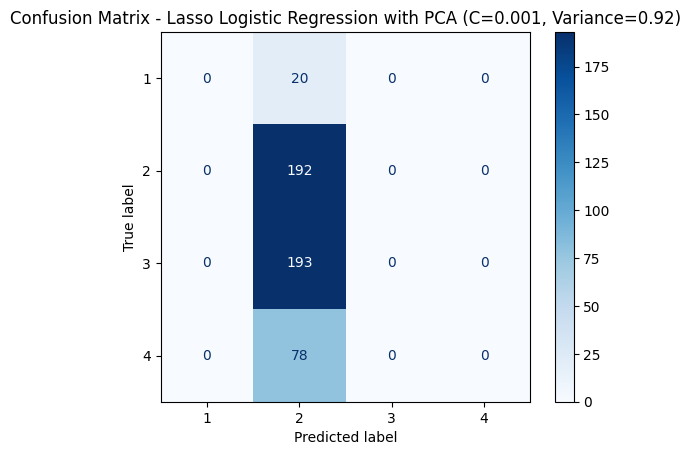


C value: 0.001, PCA Variance Threshold: 0.95
Cross-Validation Accuracy: 0.2419
Test Accuracy: 0.3975
Selected features (indices in PCA-transformed space): []


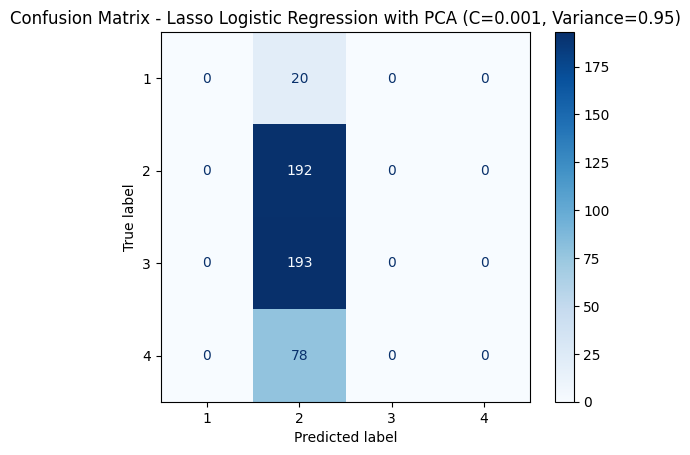


C value: 0.001, PCA Variance Threshold: 0.98
Cross-Validation Accuracy: 0.2419
Test Accuracy: 0.3996
Selected features (indices in PCA-transformed space): []


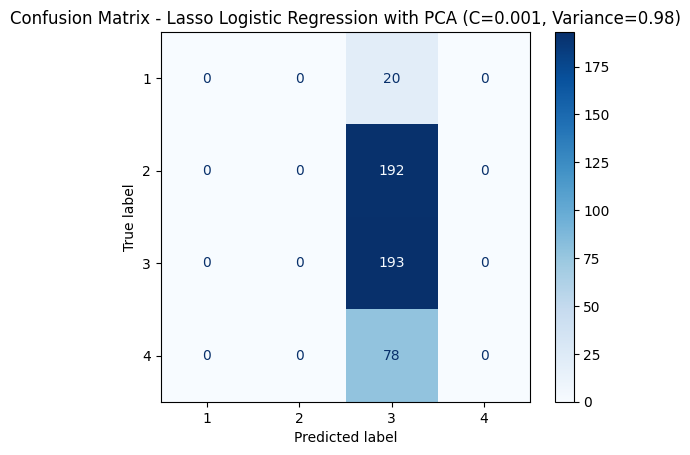


C value: 0.01, PCA Variance Threshold: 0.9
Cross-Validation Accuracy: 0.5790
Test Accuracy: 0.6542
Selected features (indices in PCA-transformed space): [0]


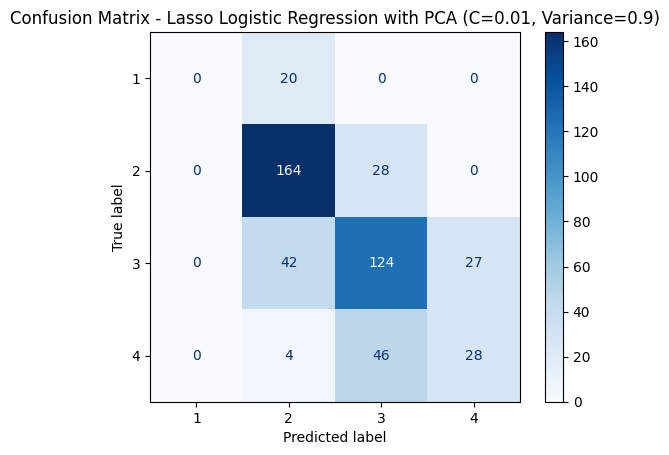


C value: 0.01, PCA Variance Threshold: 0.92
Cross-Validation Accuracy: 0.5790
Test Accuracy: 0.6542
Selected features (indices in PCA-transformed space): [0]


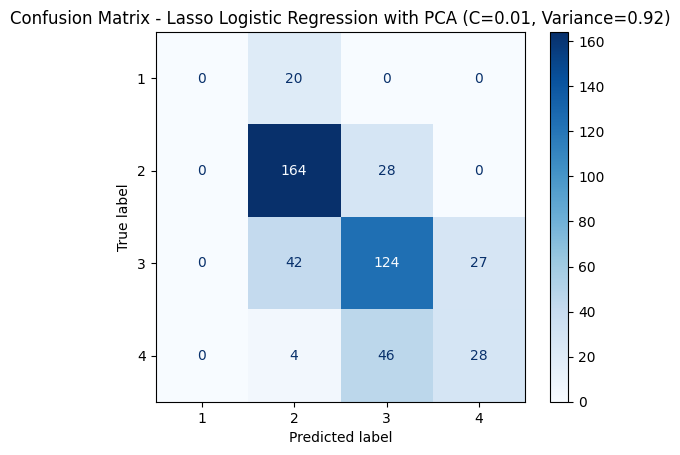


C value: 0.01, PCA Variance Threshold: 0.95
Cross-Validation Accuracy: 0.5790
Test Accuracy: 0.6542
Selected features (indices in PCA-transformed space): [0]


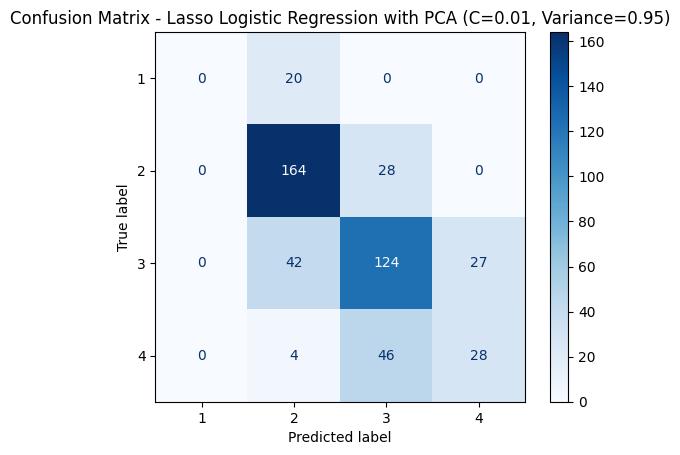


C value: 0.01, PCA Variance Threshold: 0.98
Cross-Validation Accuracy: 0.5790
Test Accuracy: 0.6542
Selected features (indices in PCA-transformed space): [0]


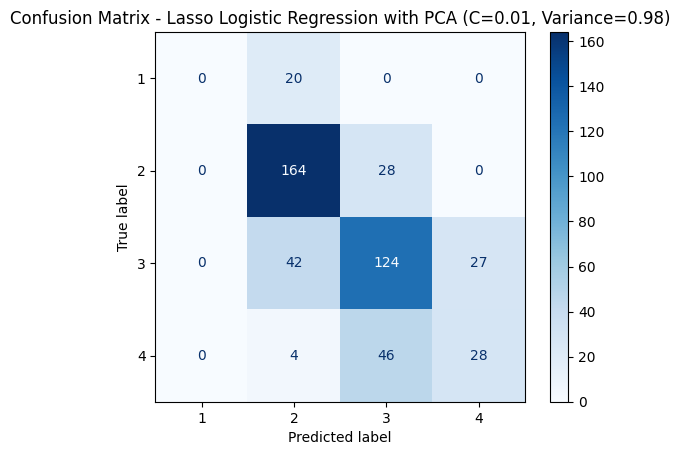


C value: 0.1, PCA Variance Threshold: 0.9
Cross-Validation Accuracy: 0.6687
Test Accuracy: 0.7164
Selected features (indices in PCA-transformed space): [0 1 2 3 4 5 6 8]


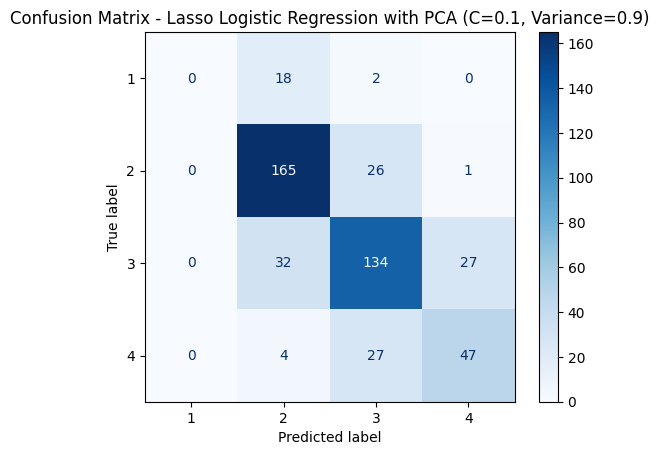


C value: 0.1, PCA Variance Threshold: 0.92
Cross-Validation Accuracy: 0.6669
Test Accuracy: 0.7122
Selected features (indices in PCA-transformed space): [0 1 2 3 4 5 6 8 9]


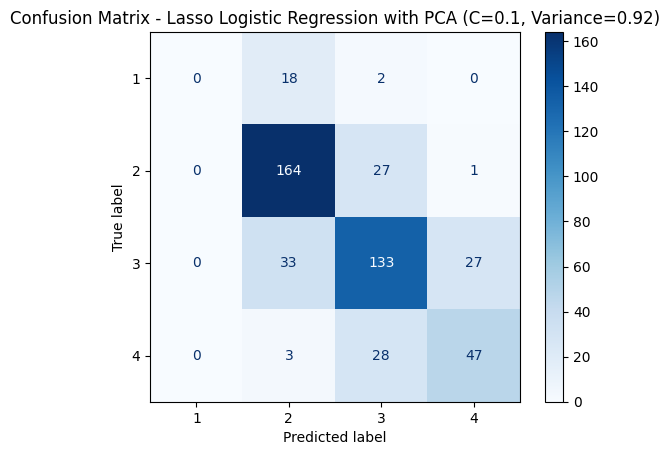


C value: 0.1, PCA Variance Threshold: 0.95
Cross-Validation Accuracy: 0.6761
Test Accuracy: 0.7019
Selected features (indices in PCA-transformed space): [ 0  1  2  3  4  5  6  8  9 10 11]


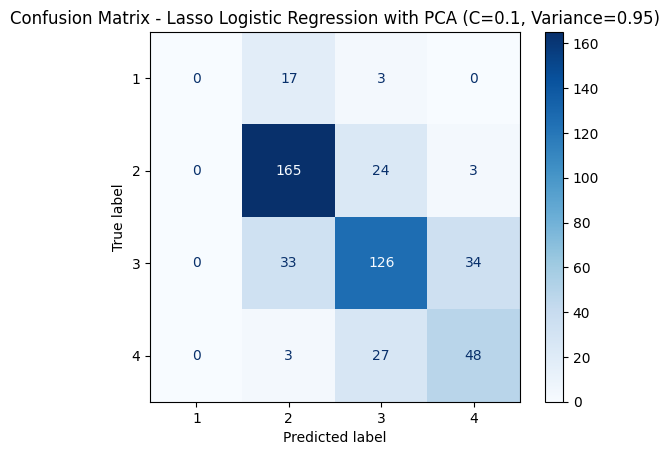


C value: 0.1, PCA Variance Threshold: 0.98
Cross-Validation Accuracy: 0.6772
Test Accuracy: 0.7019
Selected features (indices in PCA-transformed space): [ 0  1  2  3  4  5  6  8  9 10 11 12 13]


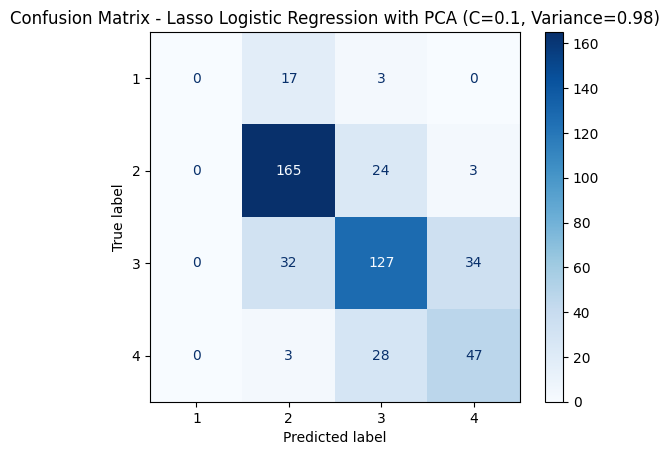


C value: 1, PCA Variance Threshold: 0.9
Cross-Validation Accuracy: 0.6861
Test Accuracy: 0.7164
Selected features (indices in PCA-transformed space): [0 1 2 3 4 5 6 7 8]


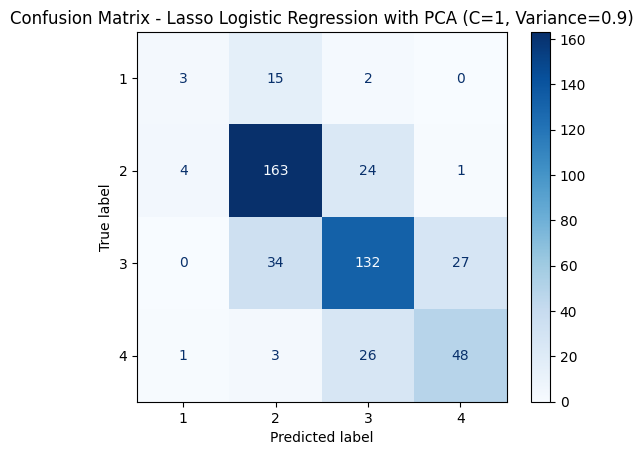


C value: 1, PCA Variance Threshold: 0.92
Cross-Validation Accuracy: 0.6943
Test Accuracy: 0.7164
Selected features (indices in PCA-transformed space): [0 1 2 3 4 5 6 7 8 9]


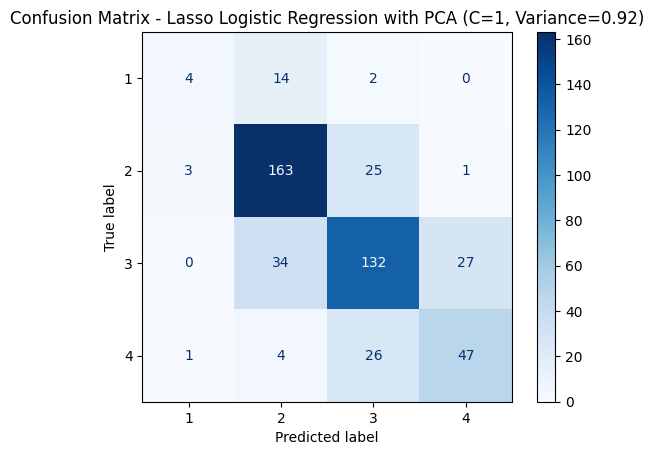


C value: 1, PCA Variance Threshold: 0.95
Cross-Validation Accuracy: 0.7015
Test Accuracy: 0.7391
Selected features (indices in PCA-transformed space): [ 0  1  2  3  4  5  6  7  8  9 10 11]


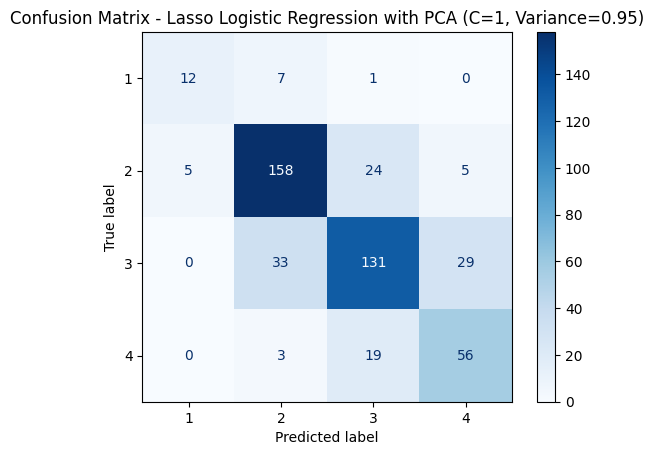


C value: 1, PCA Variance Threshold: 0.98
Cross-Validation Accuracy: 0.7247
Test Accuracy: 0.7308
Selected features (indices in PCA-transformed space): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


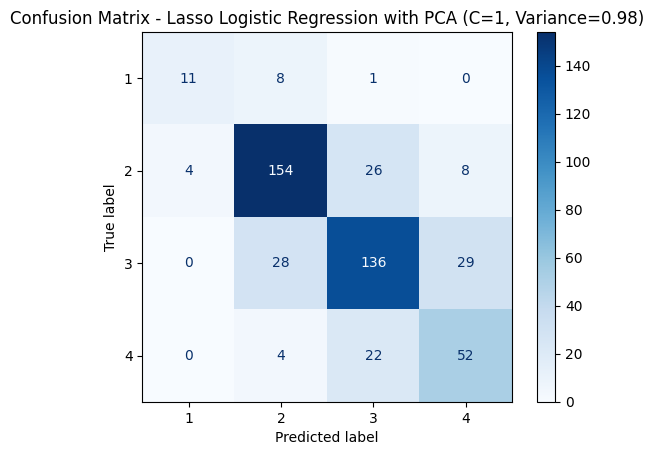


C value: 10, PCA Variance Threshold: 0.9
Cross-Validation Accuracy: 0.6857
Test Accuracy: 0.7039
Selected features (indices in PCA-transformed space): [0 1 2 3 4 5 6 7 8]


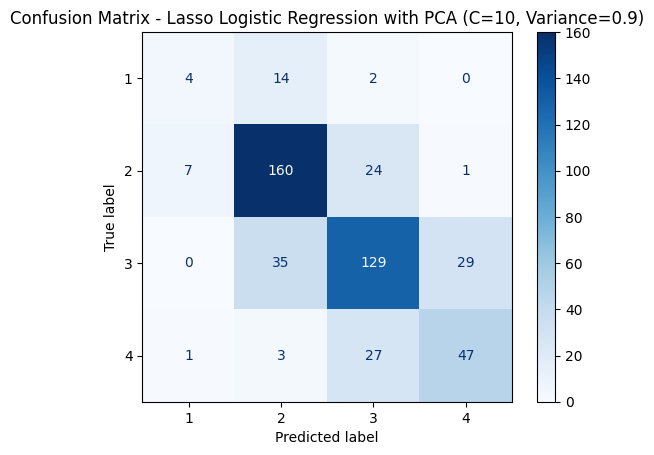


C value: 10, PCA Variance Threshold: 0.92
Cross-Validation Accuracy: 0.6920
Test Accuracy: 0.7101
Selected features (indices in PCA-transformed space): [0 1 2 3 4 5 6 7 8 9]


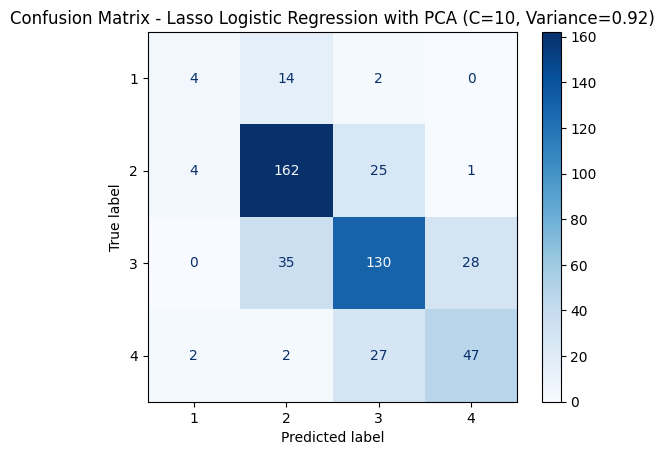


C value: 10, PCA Variance Threshold: 0.95
Cross-Validation Accuracy: 0.7064
Test Accuracy: 0.7350
Selected features (indices in PCA-transformed space): [ 0  1  2  3  4  5  6  7  8  9 10 11]


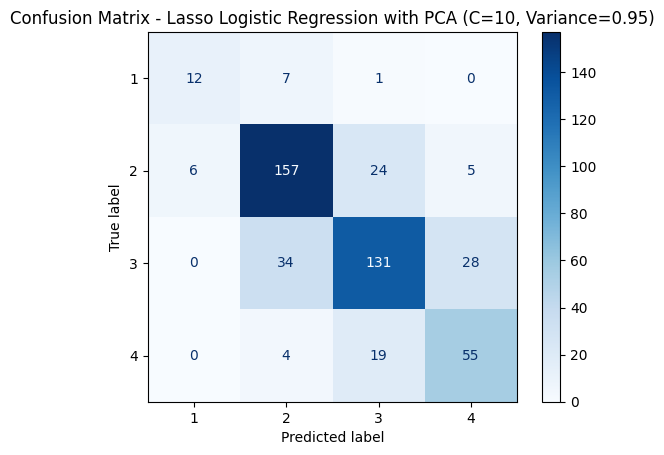


C value: 10, PCA Variance Threshold: 0.98
Cross-Validation Accuracy: 0.7253
Test Accuracy: 0.7329
Selected features (indices in PCA-transformed space): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


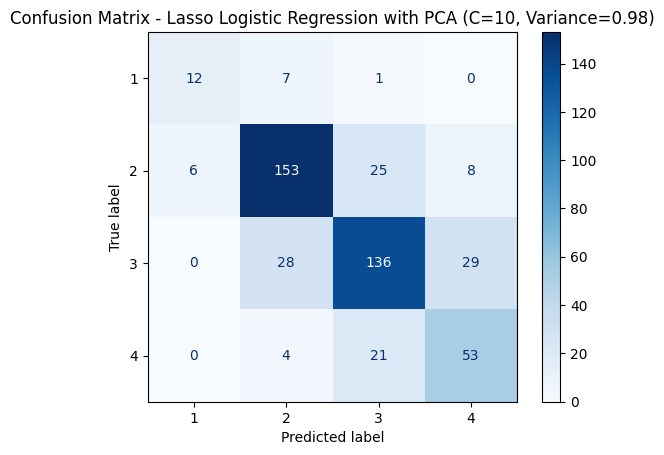


C value: 100, PCA Variance Threshold: 0.9
Cross-Validation Accuracy: 0.6857
Test Accuracy: 0.7039
Selected features (indices in PCA-transformed space): [0 1 2 3 4 5 6 7 8]


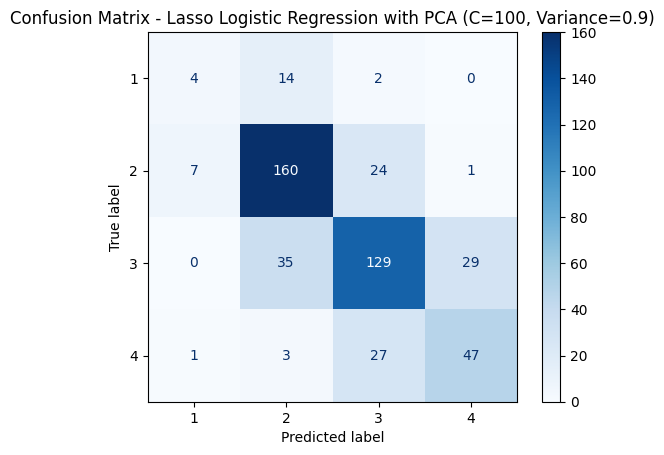


C value: 100, PCA Variance Threshold: 0.92
Cross-Validation Accuracy: 0.6920
Test Accuracy: 0.7101
Selected features (indices in PCA-transformed space): [0 1 2 3 4 5 6 7 8 9]


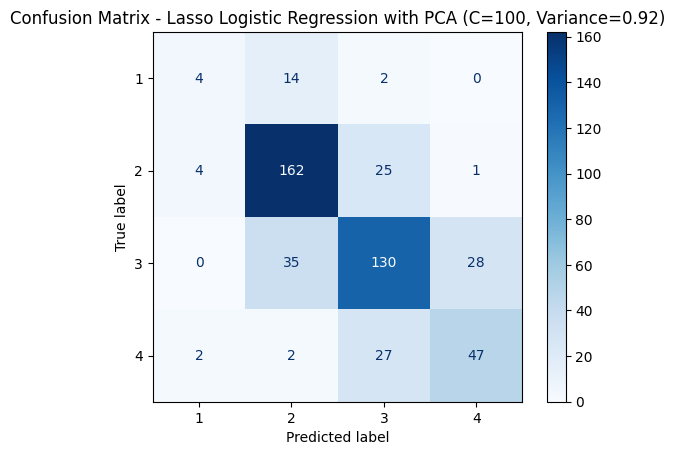


C value: 100, PCA Variance Threshold: 0.95
Cross-Validation Accuracy: 0.7073
Test Accuracy: 0.7329
Selected features (indices in PCA-transformed space): [ 0  1  2  3  4  5  6  7  8  9 10 11]


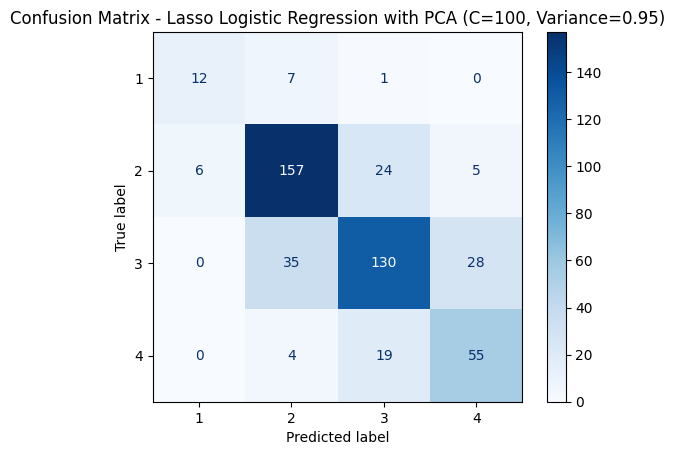

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



C value: 100, PCA Variance Threshold: 0.98
Cross-Validation Accuracy: 0.7262
Test Accuracy: 0.7350
Selected features (indices in PCA-transformed space): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


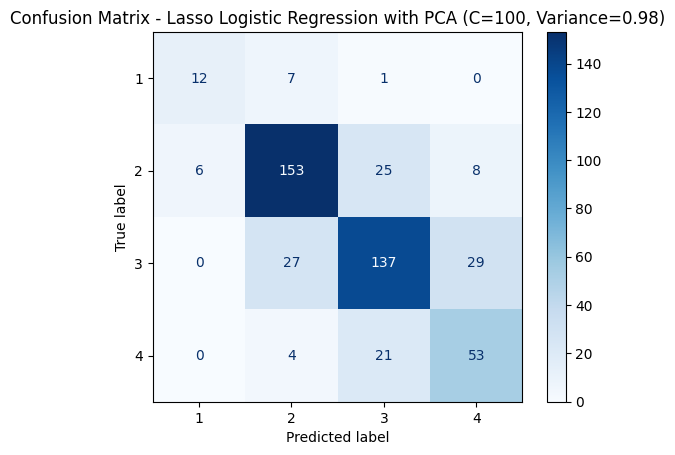


Summary of Results:
C=0.001, Variance Threshold=0.9: CV Accuracy = 0.2419, Test Accuracy = 0.3975
C=0.001, Variance Threshold=0.92: CV Accuracy = 0.2419, Test Accuracy = 0.3975
C=0.001, Variance Threshold=0.95: CV Accuracy = 0.2419, Test Accuracy = 0.3975
C=0.001, Variance Threshold=0.98: CV Accuracy = 0.2419, Test Accuracy = 0.3996
C=0.01, Variance Threshold=0.9: CV Accuracy = 0.5790, Test Accuracy = 0.6542
C=0.01, Variance Threshold=0.92: CV Accuracy = 0.5790, Test Accuracy = 0.6542
C=0.01, Variance Threshold=0.95: CV Accuracy = 0.5790, Test Accuracy = 0.6542
C=0.01, Variance Threshold=0.98: CV Accuracy = 0.5790, Test Accuracy = 0.6542
C=0.1, Variance Threshold=0.9: CV Accuracy = 0.6687, Test Accuracy = 0.7164
C=0.1, Variance Threshold=0.92: CV Accuracy = 0.6669, Test Accuracy = 0.7122
C=0.1, Variance Threshold=0.95: CV Accuracy = 0.6761, Test Accuracy = 0.7019
C=0.1, Variance Threshold=0.98: CV Accuracy = 0.6772, Test Accuracy = 0.7019
C=1, Variance Threshold=0.9: CV Accuracy = 0.6

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load cleaned dataset
file_path = 'cleaned_dataset.xlsx'
df = pd.read_excel(file_path)

# Define feature matrix and target column
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different C values (regularization strength)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# List of different PCA variance thresholds to try (to find optimal n_components)
pca_variance_thresholds = [0.90, 0.92, 0.95, 0.98]  # The proportion of variance to retain

# Initialize an empty list to store results
results = []

# Initialize K-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over each C value and each PCA variance threshold
for C_value in C_values:
    for variance_threshold in pca_variance_thresholds:
        # Apply PCA to the training data with a specified variance threshold
        pca = PCA(n_components=variance_threshold)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Implement Lasso Logistic Regression with multiclass
        lasso_lr = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=C_value)

        # Perform K-fold Cross-Validation
        cv_scores = cross_val_score(lasso_lr, X_train_pca, y_train, cv=kfold, scoring='f1_weighted')

        # Calculate the average accuracy from cross-validation
        avg_accuracy = np.mean(cv_scores)

        # Train the model using training set
        lasso_lr.fit(X_train_pca, y_train)

        # Make predictions on the test set
        y_pred = lasso_lr.predict(X_test_pca)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Results
        results.append((C_value, variance_threshold, avg_accuracy, accuracy, conf_matrix))
        selected_features = np.unique(np.where(lasso_lr.coef_ != 0)[1])
        print(f"\nC value: {C_value}, PCA Variance Threshold: {variance_threshold}")
        print(f"Cross-Validation Accuracy: {avg_accuracy:.4f}")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Selected features (indices in PCA-transformed space): {selected_features}")

        # Confusion Matrix Display
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lasso_lr.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix - Lasso Logistic Regression with PCA (C={C_value}, Variance={variance_threshold})")
        plt.show()

# summary of results
print("\nSummary of Results:")
for result in results:
    C_value, variance_threshold, avg_accuracy, accuracy, _ = result
    print(f"C={C_value}, Variance Threshold={variance_threshold}: CV Accuracy = {avg_accuracy:.4f}, Test Accuracy = {accuracy:.4f}")
